In [1]:
#import packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
g1800s=pd.read_csv('C://Users//liyua//Desktop//Python Dataset//gapminder.csv')

# Initial exploration of the dataset

In [2]:
print(g1800s.head(2))

    1800  1801   1802   1803   1804   1805   1806   1807   1808   1809  ...  \
0    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1  28.21  28.2  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12  ...   

    1891   1892   1893   1894   1895   1896   1897   1898  1899  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
1  27.28  27.27  27.26  27.25  27.24  27.23  27.22  27.21  27.2   

   Life expectancy  
0         Abkhazia  
1      Afghanistan  

[2 rows x 101 columns]


In [3]:
print(g1800s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 101 entries, 1800 to Life expectancy
dtypes: float64(100), object(1)
memory usage: 205.2+ KB
None


In [4]:
print(g1800s.describe())

             1800        1801        1802        1803        1804        1805  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean    31.486020   31.448905   31.463483   31.377413   31.446318   31.562537   
std      3.763585    3.755739    3.878204    3.901966    3.877156    3.947957   
min     23.390000   23.390000   23.390000   19.600000   23.390000   23.390000   
25%     29.000000   28.950000   28.900000   28.900000   28.950000   29.000000   
50%     31.800000   31.700000   31.600000   31.500000   31.600000   31.700000   
75%     33.900000   33.900000   33.900000   33.800000   33.870000   33.900000   
max     42.850000   40.300000   44.370000   44.840000   42.830000   44.270000   

             1806        1807        1808        1809  ...        1890  \
count  201.000000  201.000000  201.000000  201.000000  ...  201.000000   
mean    31.615970   31.573134   31.376766   31.310448  ...   32.291045   
std      4.039261    3.917339    4.017228    3.9

In [5]:
print(g1800s.shape)

(260, 101)


There are 260 rows represents 260 countries we are examining.
There are 101 columns, in which 100 are years from 1800 to 1899 and 1 column is country names. 

# Visualization of the dataset

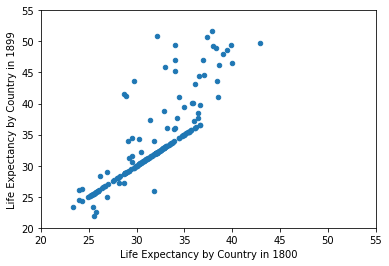

In [6]:
g1800s.plot(kind='scatter', x='1800', y='1899')

plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

plt.xlim(20, 55)
plt.ylim(20, 55)

plt.show()

The graph above shows that from 1800 to 1899 the life expectancy of a large number of countries remained the same. 

# Check the validation of the data

In [7]:
#Check if there is missing value and make sure that all the values are equal or greater than 0 since no one lives under age of 0.
def check_null_or_valid(row_data):
    no_na = row_data.dropna() #Drops missing value
    numeric = pd.to_numeric(no_na) #Make sure that all values are numeric
    ge0 = numeric >= 0 #Make sure that all values are equal or greater than 0
    return ge0

assert g1800s.columns[0] == 'Life expectancy'
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()
assert g1800s['Life expectancy'].value_counts()[0] == 1 

AssertionError: 

There is an AssertionError occurs which indicate that the first column is not 'Life expectancy'. So next, I will move the 'Life expectancy to the first.

In [8]:
cols=g1800s.columns.tolist()
cols

['1800',
 '1801',
 '1802',
 '1803',
 '1804',
 '1805',
 '1806',
 '1807',
 '1808',
 '1809',
 '1810',
 '1811',
 '1812',
 '1813',
 '1814',
 '1815',
 '1816',
 '1817',
 '1818',
 '1819',
 '1820',
 '1821',
 '1822',
 '1823',
 '1824',
 '1825',
 '1826',
 '1827',
 '1828',
 '1829',
 '1830',
 '1831',
 '1832',
 '1833',
 '1834',
 '1835',
 '1836',
 '1837',
 '1838',
 '1839',
 '1840',
 '1841',
 '1842',
 '1843',
 '1844',
 '1845',
 '1846',
 '1847',
 '1848',
 '1849',
 '1850',
 '1851',
 '1852',
 '1853',
 '1854',
 '1855',
 '1856',
 '1857',
 '1858',
 '1859',
 '1860',
 '1861',
 '1862',
 '1863',
 '1864',
 '1865',
 '1866',
 '1867',
 '1868',
 '1869',
 '1870',
 '1871',
 '1872',
 '1873',
 '1874',
 '1875',
 '1876',
 '1877',
 '1878',
 '1879',
 '1880',
 '1881',
 '1882',
 '1883',
 '1884',
 '1885',
 '1886',
 '1887',
 '1888',
 '1889',
 '1890',
 '1891',
 '1892',
 '1893',
 '1894',
 '1895',
 '1896',
 '1897',
 '1898',
 '1899',
 'Life expectancy']

In [9]:
cols=cols[-1:]+cols[:-1] #This rearranges the order of the columns and next I will apply this new order to the dataset
g1800s=g1800s[cols]

#Check again
def check_null_or_valid(row_data):
    no_na = row_data.dropna() 
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0 
    return ge0

assert g1800s.columns[0] == 'Life expectancy'
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()
assert g1800s['Life expectancy'].value_counts()[0] == 1 

I have rearranged the order of this dataset with 'Life expectancy' is the first column. I do not need to print it because the assert function does not return any error. Then I will move on. 

# Concatenate datasets

In [10]:
g1900s=pd.read_csv('C://Users//liyua//Desktop//Python Dataset//g1900s.csv')
g2000s=pd.read_csv('C://Users//liyua//Desktop//Python Dataset//g2000s.csv')
gapminder=pd.concat([g1800s,g1900s,g2000s])

print(gapminder.shape)
print(gapminder.head(3))

(780, 218)
    1800  1801   1802   1803   1804   1805   1806   1807   1808   1809  ...  \
0    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1  28.21  28.2  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12  ...   
2    NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

   2008  2009  2010  2011  2012  2013  2014  2015  2016        Life expectancy  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN               Abkhazia  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN            Afghanistan  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Akrotiri and Dhekelia  

[3 rows x 218 columns]


C:\Users\liyua\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In the next practice, I will reshape the dataset. For now, I have the life expectancy for each year in separate columns. And I will convert the dataframe into a tidy format that contains only three columns: 'country', 'year', 'life expectancy'.

In [11]:
gapminder_melt = pd.melt(gapminder,id_vars='Life expectancy')
gapminder_melt.columns = ['country','year','life_expectancy']

print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


In [13]:
# This step will ensure that all these columns are in proper data type
print(gapminder_melt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.9+ MB
None


The column 'year' should be in numeric instead of object. Let's do this.

In [14]:
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if columns are of proper data type
assert gapminder_melt.country.dtypes == np.object
assert gapminder_melt.year.dtypes == np.int64
assert gapminder_melt.life_expectancy.dtypes == np.float64

No AssertionError returned. We are good to proceed.

And next, I need to see if the spelling of country names are in proper format.

In [15]:
# Assumption of proper country names
#  1. The set of lower and upper case letters.
#  2. Whitespace between words.
#  3. Periods for any abbreviations.
# The regular expression of country names should be: '^[A-Za-z\.\s]*$' that A-Za-z matches the set of lower and upper case letters, \. matches periods, and \s matches whitespace between words.

countries = gapminder_melt['country']
countries = countries.drop_duplicates()
pattern = '^[A-Za-z\.\s]*$'
mask = countries.str.contains(pattern)
mask_inverse = ~mask
invalid_countries = countries.loc[mask_inverse]
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


Next, I will check missing values and deal with them.

In [16]:
assert pd.notnull(gapminder_melt.country).all()
assert pd.notnull(gapminder_melt.year).all()

No error returned, so there is no missing values. And we can go ahead and drop missing values in life_expectancy.

In [17]:
gapminder = gapminder_melt.dropna(how='any') #how='any' specify that rows with any missing values should be dropped.
print(gapminder.shape)

(43857, 3)


Now, the dataset 'gapminder' is clean and tidy. And we can use this dataset to work on furthur analysis.

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


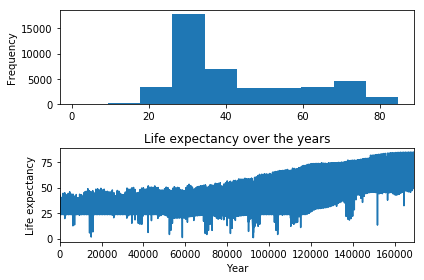

In [18]:
# Add first subplot
plt.subplot(2, 1, 1) 
gapminder.life_expectancy.plot(kind='hist')
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()
print(gapminder_agg.head())
print(gapminder_agg.tail())

plt.subplot(2, 1, 2)
gapminder.life_expectancy.plot(kind='line')

plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

plt.tight_layout()
plt.show()